<a href="https://colab.research.google.com/github/manoj25hyd/Big-Mart-Sales-Prediction-AV-Hackathon/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONVOLUTION NEURAL NETWORKS:

In [1]:
# Import Libraries
import tensorflow as ts
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# Print X_train shape
X_train.shape

(50000, 32, 32, 3)

*We have 50,000 color images in train data with image size of 32x32 with RGB color channel.*

In [4]:
# Print X_test shape
X_test.shape

(10000, 32, 32, 3)

*We have 10,000 color images in train data with image size of 32x32 with RGB color channel.*

In [5]:
# Print y_train shape
y_train.shape

(50000, 1)

In [6]:
# Print y_test shape
y_test.shape

(10000, 1)

In [7]:
# Reshape y_train from (50000,1) to (50000,)
y_train = y_train.reshape(50000)

# Reshape y_train from (10000,1) to (10000,)
y_test = y_test.reshape(10000)

In [8]:
# Get classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
# Define a function to plot images
def plot_sample(X, y, index):
  plt.figure(figsize = (2,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  plt.show()

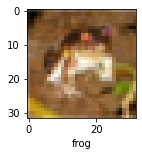

In [10]:
# Plot first image in X_train
plot_sample(X_train, y_train, 0)

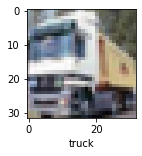

In [11]:
# Plot second image in X_train
plot_sample(X_train, y_train, 1)

In [12]:
# Normalize X_train and X_test
X_train = X_train / 255
X_test = X_test / 255

In [13]:
# Build ANN Model
ANN = models.Sequential([
          layers.Flatten(input_shape = (32,32,3)),
          layers.Dense(3000, activation = "relu"),
          layers.Dense(1000, activation = "relu"),
          layers.Dense(10, activation = "sigmoid")
        ])

ANN.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

ANN.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8152 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6237 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5401 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4830 - accuracy: 0.4755
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4311 - accuracy: 0.4957


In [14]:
# Evaluate test data
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4826 - accuracy: 0.4701


[1.4825959205627441, 0.4700999855995178]

In [15]:
# Print Classification Report
from sklearn.metrics import classification_report
import numpy as np
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1000
           1       0.57      0.65      0.60      1000
           2       0.31      0.46      0.37      1000
           3       0.39      0.23      0.29      1000
           4       0.36      0.49      0.42      1000
           5       0.45      0.31      0.36      1000
           6       0.46      0.58      0.51      1000
           7       0.67      0.40      0.50      1000
           8       0.52      0.66      0.58      1000
           9       0.67      0.38      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



*ANN is not Performing well with this data.*

In [31]:
# Build CNN Model
CNN = models.Sequential([
          # cnn
          layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
          layers.MaxPooling2D((2,2)),

          layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
          layers.MaxPooling2D((2,2)),

          #dense
          layers.Flatten(),
          layers.Dense(64, activation = "relu"),
          layers.Dense(10, activation = "softmax")     
      ])

In [32]:
# Compile the CNN Model
CNN.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [33]:
# Fit the training data
CNN.fit(X_train, y_train, epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4644 - accuracy: 0.4779
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1294 - accuracy: 0.6064
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0028 - accuracy: 0.6520
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9292 - accuracy: 0.6790
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8662 - accuracy: 0.6990
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8117 - accuracy: 0.7175
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7657 - accuracy: 0.7348
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7255 - accuracy: 0.7487
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6842 - accuracy: 0.7619
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.647

In [34]:
# Evaluate the Model with test data
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0541 - accuracy: 0.6866


[1.0540542602539062, 0.6866000294685364]

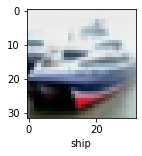

In [36]:
plot_sample(X_test, y_test, 1)

In [38]:
# Predict with X_test
y_pred = CNN.predict(X_test)
# Print y_pred
y_pred

array([[6.6109543e-04, 1.0730433e-05, 3.7704708e-04, ..., 7.5567434e-05,
        9.5850276e-03, 1.4871039e-04],
       [1.4745165e-04, 6.6288990e-01, 1.9014990e-08, ..., 3.9322867e-10,
        3.1682080e-01, 2.0141628e-02],
       [1.0066913e-02, 4.4192776e-01, 5.0457238e-05, ..., 4.1492171e-05,
        5.2869362e-01, 1.8415289e-02],
       ...,
       [4.1749544e-04, 1.0688671e-07, 4.1849602e-02, ..., 1.7821236e-02,
        3.1565462e-05, 4.8253855e-06],
       [2.4390329e-01, 7.9735845e-02, 5.4812292e-04, ..., 2.4566229e-04,
        8.5334927e-05, 7.0643742e-05],
       [3.1188762e-07, 1.3056062e-10, 9.9632291e-07, ..., 9.9991834e-01,
        6.7512917e-10, 4.7974766e-09]], dtype=float32)

In [40]:
# Convert into Classes
y_classes = [np.argmax(i) for i in y_pred]

In [42]:
y_classes[:5]

[3, 1, 8, 0, 4]

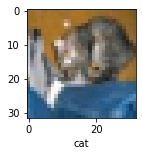

In [45]:
plot_sample(X_test, y_test, 0)

In [49]:
classes[y_classes[0]]

'cat'

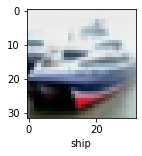

In [50]:
plot_sample(X_test, y_test, 1)

In [51]:
classes[y_classes[1]]

'automobile'

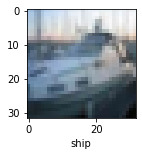

In [52]:
plot_sample(X_test, y_test, 2)

In [53]:
classes[y_classes[2]]

'ship'